<h1 > Módulo 3 - Unidad 3 </h1>
<h2> Programación para visualizaciones </h2>
<h4> Grupo 7 </h4>
<p > Carlos Felipe Cortés Cataño - Carlos Luis Mora Cañas </p>


Importamos librerías, configuramos el notebook y cargamos datos

In [59]:
#Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
import warnings

#Configuración
%matplotlib inline
sns.set(style="white", context="notebook", palette="deep")
style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 999)

#Datos

df = pd.read_excel("./games_sales_data_PBI.xlsx")
df.head(2)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,80.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,0.0,NaN,NaN,NaN


# Ejercicio 1


- Se debe proponer un año de análisis por parte del estudiante.

In [60]:
ano_sel = 2014

- Se debe proponer 2 o 3 consolas sobre las cuales se harán los análisis.

In [61]:
df["Platform"].unique()


array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', 2600.0, 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [62]:
consola1 = "PS4"
consola2 = "PC"

In [63]:
#Aplicando filtros
data = df[(df["Year_of_Release"] == ano_sel) & ((
    df["Platform"] == consola1) | (df["Platform"] == consola2))]
data.head(2)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
42,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.96,6.31,0.38,1.97,12.61,97.0,66.0,83.0,2899.0,Rockstar North,M
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,Activision,2.81,3.48,0.14,1.23,7.66,83.0,39.0,57.0,1443.0,Sledgehammer Games,M


- Se debe mostrar el top 10 de videojuegos basado en el total de ventas.

In [64]:
top_10 = data.groupby('Name')["Global_Sales"].sum().sort_values(ascending=False).head(10).reset_index()
top_10

,Name,Global_Sales
0,Grand Theft Auto V,12.61
1,Call of Duty: Advanced Warfare,8.07
2,FIFA 15,6.36
3,Destiny,5.64
4,The Last of Us,4.71
5,Far Cry 4,4.67
6,Assassin's Creed: Unity,4.51
7,Watch Dogs,4.50
8,Minecraft,4.32
9,Middle-Earth: Shadow of Mordor,3.31


- Se debe responder a la siguiente pregunta: ¿cuánto fué la suma aportada por estos 10 juegos, versus el resto de los juegos?

In [65]:
suma_aportada_top10 = top_10["Global_Sales"].sum()
suma_aportada_top10


58.7

In [66]:
total_ventas = data["Global_Sales"].sum()
total_ventas

113.27

In [67]:
suma_aportada_otros = total_ventas - suma_aportada_top10
suma_aportada_otros


54.56999999999999

La suma aportada por el top 10 de juegos con mayores ventas fue 58.7 versus 54.56 aportado por los otros juegos. Más de un 50%

- Porcentualmente hablando ¿cuánto es el aporte del top 10 de juegos elegido versus el resto de los juegos?

In [68]:
perc_aportado_top10 = round(suma_aportada_top10 / total_ventas * 100,2)
perc_aportado_top10

51.82

In [69]:
perc_aportado_otros = round(suma_aportada_otros / total_ventas * 100, 2)
perc_aportado_otros


48.18

Text(0.5, 1.0, "Top 10's percentage sales")

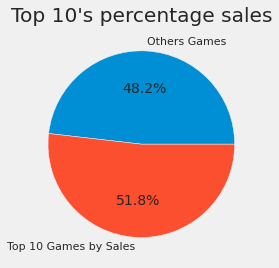

In [70]:
labels=["Others Games", "Top 10 Games by Sales"]
fig, ax=plt.subplots(1,1)
ax.pie(x=(suma_aportada_otros, suma_aportada_top10), labels=labels, autopct="%1.1f%%")
plt.title("Top 10's percentage sales")


- Plantee una visualización que permita determinar el top 10 de ventas de juegos seleccionados.

Text(0.5, 1.0, 'PS4 and PC Top 10 Games by Sales in 2015')

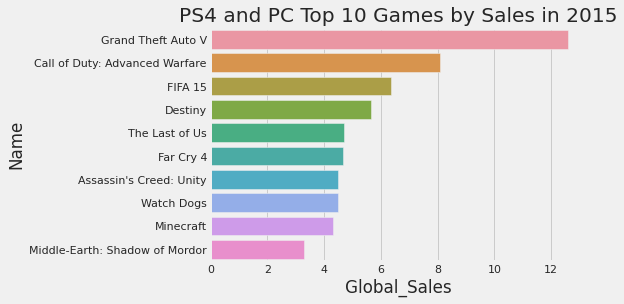

In [71]:
sns.barplot(x=top_10["Global_Sales"], y=top_10["Name"])
plt.title("PS4 and PC Top 10 Games by Sales in 2015")


# Ejercicio 2

¿Cómo se encuentran porcentualmente divididas el total de ventas?

In [117]:
distribucion = df.groupby("Genre")["Global_Sales"].sum(
).reset_index().sort_values("Global_Sales", ascending=False)
distribucion


,Genre,Global_Sales
0,Action,1745.27
10,Sports,1332.00
8,Shooter,1052.94
7,Role-Playing,934.40
4,Platform,828.08
3,Misc,803.18
6,Racing,728.90
2,Fighting,447.48
9,Simulation,390.42
5,Puzzle,243.02


Text(0.5, 1.0, 'Sales distribution by Genre')

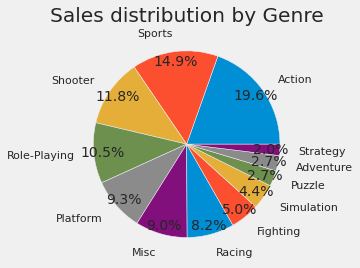

In [124]:
division = distribucion["Global_Sales"]
labels = distribucion["Genre"]
fig, ax = plt.subplots(1, 1)
ax.pie(x=division,
       labels=labels, autopct="%1.1f%%", pctdistance=0.9, labeldistance=1.2)
plt.title("Sales distribution by Genre")


- ¿Cuál es la tendencia de las ventas en Japón, Estados Unidos y Europa?

In [139]:
tendencias = df.groupby("Year_of_Release")[
    ["NA_Sales", "EU_Sales", "JP_Sales"]].sum().reset_index().dropna()
tendencias.head(3)


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales
0,1980.0,10.59,0.67,0.0
1,1981.0,33.40,1.96,0.0
2,1982.0,26.92,1.65,0.0


<AxesSubplot:title={'center':'Sales by year'}, xlabel='Year_of_Release', ylabel='USD'>

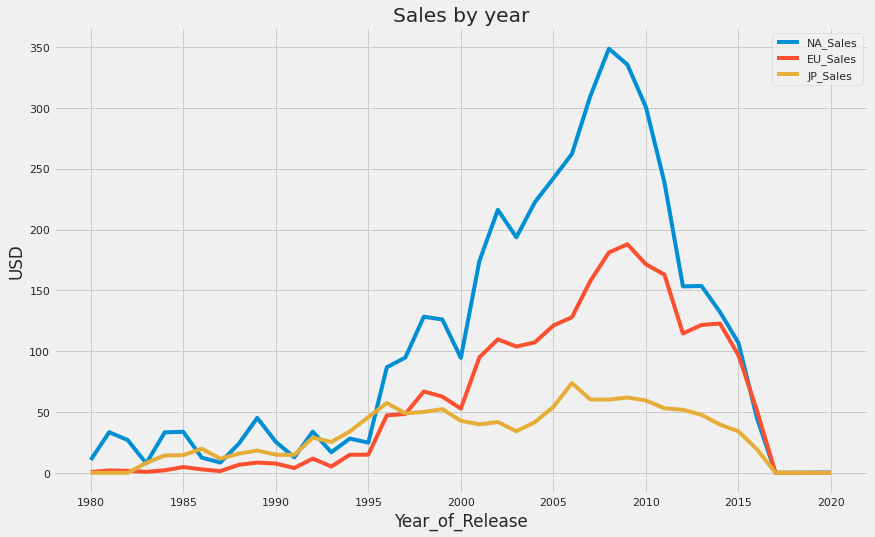

In [140]:
tendencias.plot("Year_of_Release", y=[
                "NA_Sales", "EU_Sales", "JP_Sales"], figsize=(13, 8), ylabel="USD", title="Sales by year")


- ¿Cuál es la tendencia para los géneros de Action, Role-Playing, Strategy and Misc?

In [141]:
data = df[(df["Genre"] == "Action") | (df["Genre"] == "Role-Playing") |
          (df["Genre"] == "Strategy") | (df["Genre"] == "Misc")]
data.head(2)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,0.0,NaN,NaN,NaN
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,66.0,129.0,Nintendo,E


In [151]:
data = data.groupby(["Genre", "Year_of_Release"])["Global_Sales"].sum().reset_index()
data.head()

,Genre,Year_of_Release,Global_Sales
0,Action,1980.0,0.34
1,Action,1981.0,14.84
2,Action,1982.0,6.52
3,Action,1983.0,2.86
4,Action,1984.0,1.85


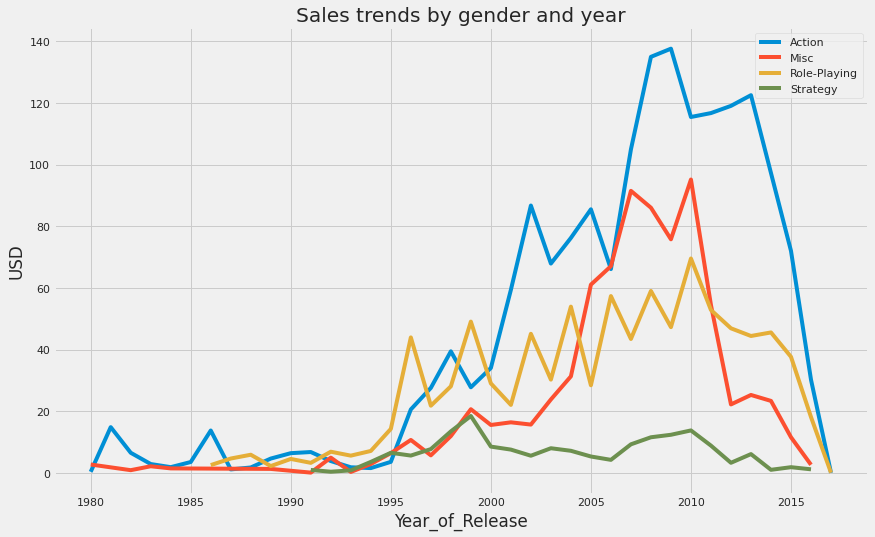

In [158]:
fig,ax=plt.subplots()
for key,genre in data.groupby("Genre"):
    genre.plot(x="Year_of_Release", y="Global_Sales",ax=ax, label=key, figsize=(13,8),
               title="Sales trends by gender and year", ylabel="USD")


# Ejercicio 3

# Ejercicio 4

# Preguntas bonus